# COURSEWORK SPECIFICATION

## COM1011 - Fundamentals of Machine Learning

**Module Leader:** Chico Camargo

**Academic Year:** 2025/26

**Title:** Coursework 2

**Submission deadline:** 1st December at 12:00pm (noon), 2025.

This assessment contributes **70%** of the total module mark and assesses the following intended learning outcomes:

1. Understanding and identifying the compromises and trade-offs that must be made when using a machine learning approach;
2. Analysing problems from a data-centric point of view, choosing among a range of supervised and unsupervised machine learning techniques and using relevant software libraries to solve them
3. Stating the importance and difficulty of establishing machine learning solutions;
4. Using elementary python for implementing machine learning algorithms.
5. Identifying the compromises that must be made when translating theory into practice


__________________________

# What to submit

You are required to submit your assignment **1st December at 12:00pm (noon), 2025**.

Please do all your work in this Jupyter notebook. Make a separate cell for every few lines of code, and use separate cells for text, like this one.
Save your file in the format `COM1011_STUDENTNUMBER.ipynb` and zip it.
For example, if your student number is 12345678, save your coursework as `COM1011_12345678.ipynb`.
Once you have done that, zip the file, producing a file called `COM1011_12345678.zip`. This is the file you will have to upload and submit to ELE.

This assignment will also use additional CSV files. Do not include them in the `COM1011_STUDENTNUMBER.zip` file.

____________________


# Answer template

Please use this notebook for your coursework. Feel free to add more cells for your code and answers, but try to stick to this format. This will make it easier to mark everyone's work fairly.

___________________

_____________________

# Part A – Probability and Bayesian Inference [10 marks]

Consider a simple poker game. Suppose a deck of poker cards contains four suits: Clubs, Spades, Hearts, and Diamonds, with each suit having 8 cards numbered from 1 to 8. So the total number of cards is 32. The card with the number 8 is the largest, while the card with the number 1 is the smallest. Cards of different suits with the same number are considered equal.

(1) Suppose person A fetches a card with the number 3 of Clubs from the deck. Person B then fetches another card from the deck. What is the probability that person B's card is less than person A's card? Explain how you arrived at the answer. [1 mark]

Answer to (1): 8/31

Assuming the ordering of ther cards is random, the probability of a chosen card being less than a 3 of Clubs would be 8/31 (4 pairs of cards 1 and 2 from the different suits. There's 31 cards because one was taken but not put back)


(2) If you have drawn four cards sequentially from the deck of 32 cards. What is the total probability that the four cards have the same number 3? (1 mark)


Answer to (2): 1/35960

Probability equals the number of desired cards divided by total number of cards. Since there are only 4 cards of identical number and they arent returned, the probability of drawing 4 cards of identical number are:

4/32 * 3/31 * 2/30 * 1/29 = 24/863040 = 1/35960



(3) If you have drawn four cards sequentially from the deck of 32 cards. What is the total probability that the four cards are of Clubs? Explain how you arrived at the answer [1 mark]

Answer to (3): 7/3596

Since there are 8 cards of identical number and they arent returned, the probability of drawing 4 cards of identical suit are:

8/32 * 7/31 * 6/30 * 5/29 = 7/3596

(4) Suppose person A fetches a card with the number 3 of Hearts from the deck. Person B then fetches another card with the number 6 from the deck. What is the probability that person B's card is also of Hearts? Explain how you arrived at the answer by using Bayesian formula. [2 mark]

Answer to (4): 1/4

Bayes' Theorem:

    P(A|B) = P(B|A)*P(A) / P(B)

There are 31 cards left in the deck, 7 of which are hearts. If B drew a 6, there is a 1/4 chance it is also of hearts.


(5) Suppose person A fetches a card with the number 2 from the deck of 32 cards. Person B then fetches another card with the number 4 from the deck. What is the probability that person B's card and A's card have the same suit? Explain how you arrived at the answer by using Bayesian formula. [2 marks]

Answer to (5): 7/124

Cards = 32 then 31

Hearts = 8 then 7

Bayes' Theorem:

    P(A|B) = P(B|A)*P(A) / P(B)

A then B = 

    8/32 * 7/31 = 56/992 = 7/124

(6) Briefly explain how  Naive Bayesian classifier works such as how the conditional probability is computed for both the cases of discrete features and contineous features. [2 marks]

What is the major limitation of Naive Bayesian classifier in practice? [1 mark]

Answer to (6):

The Naive Bayesian Classifier is a machine learning model that uses probability to predict future data points. BEcause it's Naive, it carries many assumptions and limitations, such as assuming that all variables are independent of eachother, which limits how accurate the model's predictions will be when it comes to generalising.


_____________________

# Part B – Clustering and Dimension Reduction [32 marks]

## 1 Implement K-means clustering for fashion-MNIST dataset:

(7) Load the fashion-MNIST test dataset (`t10k-labels-idx1-ubyte.gz` and `t10k-images-idx3-ubyte.gz`), then obtain the image data denoted as `X_test` and the ground truth labels denoted as `y_test`. After that, pre-process `X_test` by scaling the image pixel values to values between 0 and 1. Source code is provided. [0 mark]

[hint: check https://github.com/zalandoresearch/fashion-mnist?tab=readme-ov-file#get-the-data for detailed information about fashion-MNIST dataset]


In [2]:
# answer to (7). You may need to change path for `t10k-labels-idx1-ubyte.gz` and `t10k-images-idx3-ubyte.gz`
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load fashion-MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

location = r""
X_test, y_test = load_mnist(location, kind='t10k')

X_test = X_test/255

X_train, y_train = load_mnist(location)

X_train = X_train/255

print(np.max(X_test))
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)


1.0
(60000, 784)
(60000,)
(10000, 784)
(10000,)


(8) Obtain all the test images and their (ground-truth) labels for '3','6','7', respectively, and then rearrange the samples and labels in a random order. [1 mark]

[hint: check https://numpy.org/doc/2.2/reference/generated/numpy.isin.html and https://numpy.org/doc/2.1/reference/random/generated/numpy.random.permutation.html]



In [3]:
train_mask = np.isin(y_train, [3, 6, 7])
X_train = X_train[train_mask]
y_train = y_train[train_mask]

test_mask = np.isin(y_test, [3, 6, 7])
X_test = X_test[test_mask]
y_test = y_test[test_mask]

print(y_train)
print(y_test)

X_train = np.random.permutation(X_train)
y_train = np.random.permutation(y_train)
X_test = np.random.permutation(X_test)
y_test = np.random.permutation(y_test)

print(y_train)
print(y_test)

[3 7 7 ... 6 7 3]
[6 6 7 ... 3 7 6]
[7 3 6 ... 7 7 6]
[6 6 7 ... 3 7 6]


(9) Use PCA with 2 components to visualise the test data samples in (8) with different colors representing different real (i.e., ground-truth) clusters in a 2d plot. In the plot legend, indicate which colours correspond to which digits. You should use three colors for the three labels: '3','6', '7'. [2 marks]

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)


In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.38959662 0.15684484]


In [6]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

c:\Users\Dylan\anaconda3\envs\jupyter_notebook\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


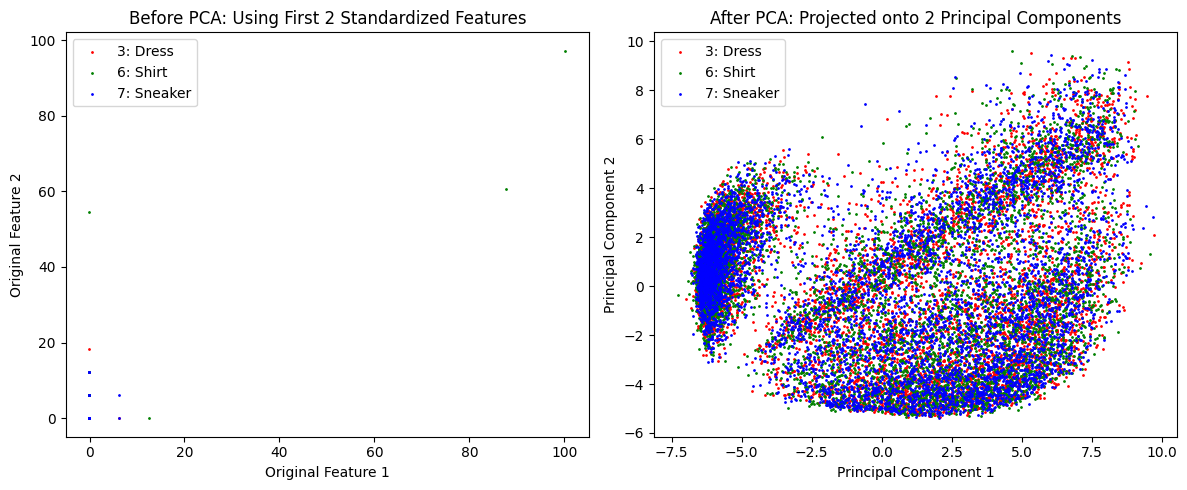

In [7]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
colors = ["r", "g", "b"]
labels = ["3: Dress", "6: Shirt", "7: Sneaker"]
for i, color, label in zip(np.unique(y_train), colors, labels):
    plt.scatter(X_train_scaled[y_train == i, 0], X_train_scaled[y_train == i, 1], color=color, label=label, s=1)
plt.xlabel('Original Feature 1')
plt.ylabel('Original Feature 2')
plt.legend()
plt.title('Before PCA: Using First 2 Standardized Features')


plt.subplot(1, 2, 2)
colors = ["r", "g", "b"]
labels = ["3: Dress", "6: Shirt", "7: Sneaker"]
for i, color, label in zip(np.unique(y_train), colors, labels):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], color=color, label=label, s=1)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.title('After PCA: Projected onto 2 Principal Components')

plt.tight_layout()
plt.show()

(10) Using the K-means clustering algorithm to cluster the test images in (8) directly, using k=2, 3 and 4. And then use PCA with 2 components to visualize the test data samples with different colors representing different predicted clusters in a 2d plot for each k value. You need to produce three plots, one plot for each k value. [3 marks]


Index(['Feature1', 'Feature2', 'Cluster', 'Colour', 'Label'], dtype='object')


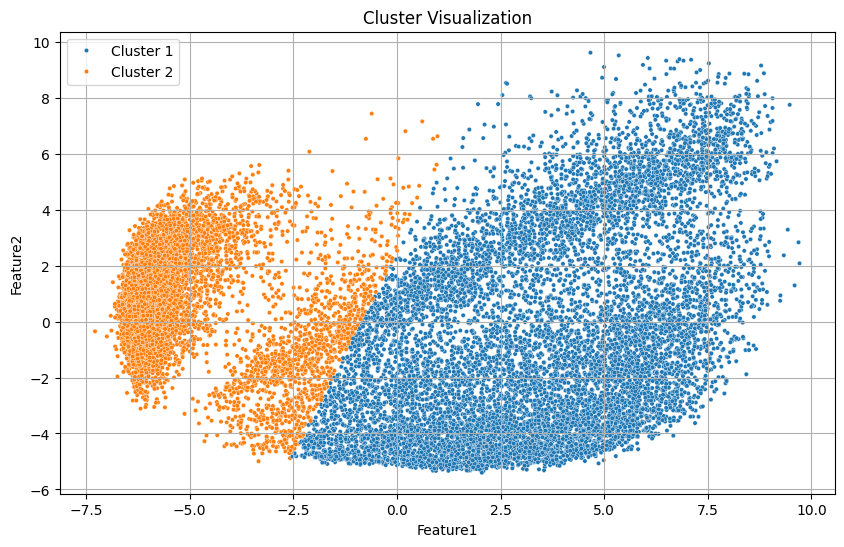

Index(['Feature1', 'Feature2', 'Cluster', 'Colour', 'Label'], dtype='object')


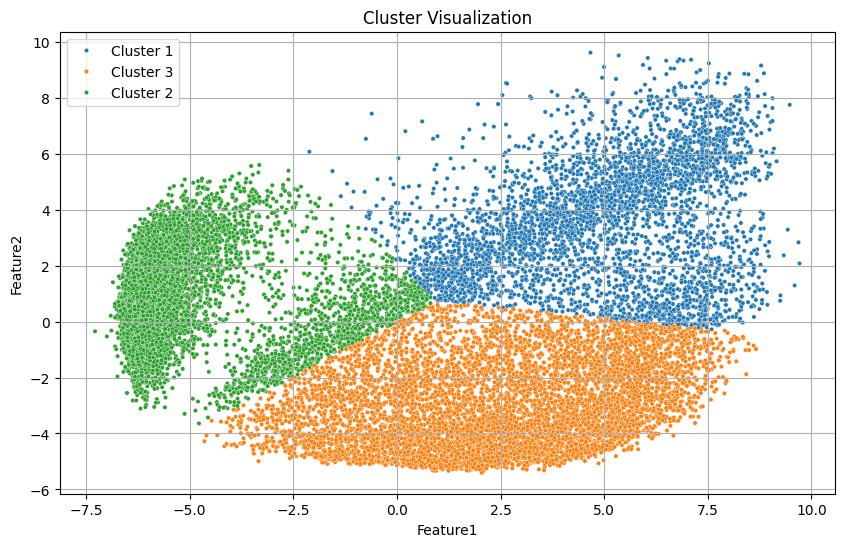

Index(['Feature1', 'Feature2', 'Cluster', 'Colour', 'Label'], dtype='object')


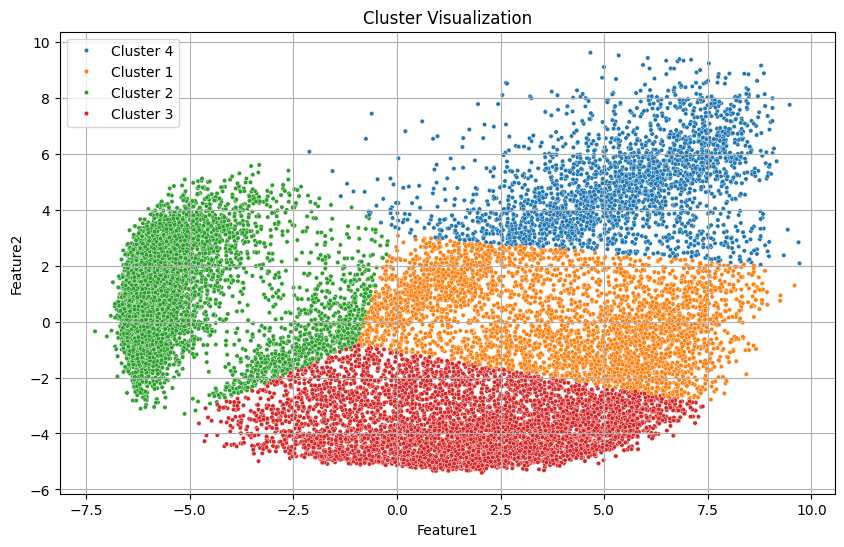

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

def pca_kmeans_cluster_plot(x):
    from sklearn.decomposition import PCA
    pca = PCA(n_components=x, random_state=42)
    X_train_pca = pca.fit_transform(X_train)

    feature_1 = [item[0] for item in X_train_pca]
    feature_2 = [item[1] for item in X_train_pca]

    data = pd.DataFrame({
        'Feature1': feature_1,
        'Feature2': feature_2
    })


    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)

    kmeans = KMeans(n_clusters=x, random_state=42)
    kmeans_labels = kmeans.fit_predict(scaled_data)


    colors = ["r", "b", "g", "y"]
    labels = ["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"]

    colors_labels = [colors[index] for index in kmeans_labels]
    label_labels = [labels[index] for index in kmeans_labels]

    data['Cluster'] = kmeans_labels
    data['Colour'] = colors_labels
    data['Label'] = label_labels

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x='Feature1', y='Feature2', hue='Label', s=10)
    plt.title('Cluster Visualization')
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')


    plt.legend()

    plt.grid(True)
    plt.show()

pca_kmeans_cluster_plot(2)
pca_kmeans_cluster_plot(3)
pca_kmeans_cluster_plot(4)

(11) Calculate and print the respective Davies-Bouldin scores for k=2,3,4 in (10). Which k value produces the best clustering, according to the Davies-Bouldin score. Then answer: is it consistent with the ground truth number of clusters from fashion-MNIST?   [2 marks]

In [19]:
#answer to (11)
from sklearn.metrics import davies_bouldin_score

def cluster_score(x):
    from sklearn.decomposition import PCA
    pca = PCA(n_components=x, random_state=42)
    X_train_pca = pca.fit_transform(X_train)


    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(X_train_pca)

    kmeans = KMeans(n_clusters=x, random_state=42)
    kmeans_labels = kmeans.fit_predict(scaled_data)


    db_index = davies_bouldin_score(X_train_pca, kmeans_labels)
    print(f"Davies-Bouldin Index for k = {x}: {db_index}")

cluster_score(2)
cluster_score(3)
cluster_score(4)


Davies-Bouldin Index for k = 2: 0.7071722532939954
Davies-Bouldin Index for k = 3: 1.0776876316313952
Davies-Bouldin Index for k = 4: 1.2135409817601641


continued answer to (11)



 (12) Calculate and print the respective silhouette_scores for k=2,3,4 in (10). Which k value produces the best clustering, according to the Silhouette score. Then answer: is it consistent with the ground truth number of clusters from fashion-MNIST?  [2 marks]

In [25]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score


range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(X_train_pca)

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(scaled_data)

    silhouette_avg = silhouette_score(X_train_pca, kmeans_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.5115286251406399
For n_clusters = 3 The average silhouette_score is : 0.5156654097419148
For n_clusters = 4 The average silhouette_score is : 0.4657759470772635


k = 3 has the best silhouette score.

Continued answer to (12)


(13) Using the K-means clustering algorithm to cluster the first two components of PCA being applied to the tested images, using k=2, 3 and 4. And then compare the clustering results with those from (10) by making of 2 subplots for each value of k: one subplot with the clustering done on the whole images, one sublplot with the clustering done with just the two first components of the PCA. [2 marks]


In [32]:
#answer to (13)
#perform K-means



(14) Compute the Silhouette scores for different k values in (13) and then compare with those obtained in (12). Answer: are the Silhouette scores obtained from the clustering of whole images consistent with the Silhouette scores obtained by clustering only the two first PCA components?  
[2 marks]


In [33]:
#answer to (14)
from sklearn.metrics import silhouette_score




Continued answer to (14)


(15) Let's compare the result of dimensionality reductions by PCA with 2 components and tSNE with 2 components. Apply PCA and tSNE to the test images of '3', '6', and '7', and then visualize the results in 2 subplots, one for each method. Use different colors to represent different real (ground truth) clusters.  [2 marks]  

In [34]:
#answer to (15)
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE






## 2. Implementing DBSCAN clustering for classes of '3', '6', and '7' of fashion-MNIST dataset:


(16) Firstly, use the DBSCAN clustering algorithm to cluster the test images directly by setting the eps parameter to 0.3 and the min_sample to 5. And then apply DBSCAN to cluster the first 2 PCA components of the test images by setting the eps parameter to 0.3 and the min_sample to 5.
Visualize the clustering results in two subplots for each k value and also print out the numbers of estimated clusters. [2 marks]






In [35]:
#Answer for (16)

from sklearn.cluster import DBSCAN






(17) Changing the eps parameter in (16) to 0.5 and 1, and briefly summarize your observations of the experimental results in terms of the stability of the DBSCAN method in comparison to K-means: is DBSCAN more or less stable than K-means, when it comes to changing hyperparameters? [2 marks]


Answer to (17)



(18) Compare the performance of K-means and DBSCAN when clustering the data points obtained by applying tSNE with 2 components on test images of classes '3', '6', and '7'.

Set k in K-means to k=3. Play with different values of (eps, min_samples) in DBSCAN to find a proper setup. Visualize the clustering results in 2 subplots. Answer: which method is more robust from the above results? How did you arrive at that conclusion? [2 marks]


In [36]:
#Answer to (18)
from sklearn.manifold import TSNE




Continued answer to (18).


(19) Implement bisecting K-means algorithm and Gausian mixture models to cluster the 2 components of tSNE for the test images of classes '3', '6', and '7'. Set the number of clusters to be 3.    [2 marks]

In [37]:
# Answer to (19)
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.cluster import BisectingKMeans



(20). Usually, DBSCAN takes longer than K-means to run, and the time it takes to run is affected by the eps parameter. Explain why that is the case. [4 marks]

Answer to (20)



(21). Provide an example of one case in which it might be better to use DBSCAN rather than K-means, and an example of one case in which it might be better to use K-means rather than DBSCAN. Explain why, in both cases. [4 marks]

Answer to (21):





_____________________

# Part C – Classification and Regression [32 marks]

## 1 Implement a multi-class Logistic Regression classifier for fashion-MNIST dataset.  [20 marks]

(22) Load "train-labels-idx1-ubyte.gz" and "train-images-idx3-ubyte.gz". In the variable X_tmp (see the code below), every row represents a greyscale image, and every one of the 784 columns represent a pixel value. 784 = 28 x 28. So each image is size 28*28.

First, load the two files "train-labels-idx1-ubyte.gz" and "train-images-idx3-ubyte.gz". Then, perform train-test-split to prepare both the training data in terms of (X_train, y_train) and test data in terms of (X_test, y_test). The code for this question is provided below to faciliate the implementation for the following questions. [0 mark]

In [1]:
# answer for (22). You may need to change the path for "train-labels-idx1-ubyte.gz" and "train-images-idx3-ubyte.gz".
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np


def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load fashion-MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels


X_tmp, y_tmp = load_mnist('/content/drive/MyDrive/coursework2/', kind='train')

# normalization
X_tmp = X_tmp/255.0


plt.figure(figsize=(15,3))
for i in range(5):
  image = X_tmp[i,:].reshape(28,28)
  plt.subplot(1, 5, i+1)
  plt.imshow(image, cmap='gray')
  plt.axis('off')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_tmp, y_tmp, test_size=0.2, random_state=1)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/coursework2/train-labels-idx1-ubyte.gz'

(23)

Implement a two-class Logistic Regression classifer for classes with labels 4 and 6 in fashion-MNIST by using LogisticRegression from `sklearn.linear_model`. Set random_state to 42, solver='sag' and max_iter=200 in LogisticRegression- (look at the documentation online if needed). Print both the training and test classfication accuracices. [1 mark]

In [ ]:
#answer to (23)

import numpy as np


(24) Test solver='sag', random_state=42, and max_iter={300, 500} in (23). Print both the training and test classfication accuracices. [2 marks]

In [ ]:
# answer to (24)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support



(25) Plot both the training and test accuracies for the maximum iterations of 200, 300,  500 being set in LogisticRegression, based on the results from (23) and (24). Put the two curves (one for the training curve and the other for the test curve) in the same 2d plot for easy comparison. Make X axis be the number of maximum iterations (200, 300, 500) and the y axis be the accuracy. [1 mark]

In [ ]:
# Answer to (25)




(26) Three classification models have been obtained from (23) and (24) by setting different values for the hyper-parameter max_iter. Which model should we choose? Explain why. [1 mark]

What is overfitting? Why is that a problem, and how can one avoid it? [3 marks]


Does the plot in (25) exhibit over-fitting? Explain why. [1 mark]    


Answer to (26):

(27) Let's do some data augmentation to improve the test performance in (23) and (24). In doing so, prepare additional training data for class 4 and 6 of fashion-MNIST by flipping each image horizontally using a library like numpy.flip. Display one original image alongside its flipped version to demonstrate the augmentation.   [2 marks]

Then, use both the original training data and the flipped training data to train the two-class Logistic Regression classifer. Print out the training and test accuracies for max_iter = {200, 300, 500}.  [2 marks]

In [ ]:
# Answer to (27)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from scipy.ndimage import rotate



(28) In general, is the image-flip technique a reasonable approach for the considered classification problem? Provide your reasoning. [2 marks]

Is the test accuracy obtained in (27) better than those in (23) and (24)? [1 mark]

Consider three approaches: 1-change to advanced machine learning models, 2-employ other data augmentation techniques, 3-employ other data pre-processing techniques.  What do you think is the most effective approach to improve the test performance ? Why. [2 marks]

Elaborate on the most effective approach you have chosen by providing more detailed suggestions. [2 marks]

Answer to (28):



## 2 Implement regression for the housing dataset.  [12 marks]

(29) Check how normalization affects the regression performance with the dataset "housing.csv".

Firstly, visualize the correlation matrix in terms of the heat map for all the 14 features. [0.5 mark]

Secondly, implement a Linear model that use only the 'CRIM' and 'RM' to predict 'TAX' without normalization. In doing so, split the data into training and test datasets. Report both the training and test errors in terms of mean squared error (MSE). [0.5 mark]  

Thirdly, do normalization (refer to the operation of scaling each feature to be in the range of [0,1]) to the data, and then implement a Linear model that use normalized 'CRIM' and normalized 'RM' to predict normalized 'TAX'. Report both the training and test errors.  What conclusions can you draw by comparing the above prediction results regarding the impact of normalization? [1 mark]  





In [ ]:
# Answer to (29)
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
import pandas as pd
from matplotlib import pyplot as plt


column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

regression_data = pd.read_csv('/content/drive/MyDrive/coursework2/housing.csv')

#regression_data=regression_data.astype(float)

correlation_matrix = regression_data.corr()



Continued answer to (29):


(30) Check how correlation strength affects the regression performance with the dataset "housing.csv".

Use normlized "CRIM" and normalized "ZN" to predict normalized "TAX" by using a linear model. Print out the training and test mean squared error. Remember using the same random_state and the same test_size when running the train_test_split function from sklearn.model_selection.   [1 mark]  

Use normlized "CRIM" and normalized "INDUS" to predict normalized "TAX" by using a linear model. Print out the training and test mean squared error. Remember using the same random_state and the same test_size when running the train_test_split function from sklearn.model_selection.   [1 mark]  





In [ ]:
# Answer to (30)



(31) What conclusions can you draw by comparing the test errors of (29) and (30) regarding the impact of the correlation strength (check the heat map shown above)? [1 mark]

Answer to (31):



(32) Convert a regression problem to a classification problem of 10 classes.

First pre-processing the data for "TAX" to be in the range of [0,10) denoted as yy in the data type of float. Then tranform (via the rounding opertion) yy into the data type of integer within {0,1,2,.., 9} denoted as y. [1 mark]

Obtain training and test datasets from  normlized "CRIM", normalized "INDUS", and the ground truth labels y. Then implement a Logistic classifer and report the training and test accuracies.  Set random_state to 42, solver='sag' and max_iter=200 in LogisticRegression. [1 mark]

Rescale the prediced labels from the Logistic classifer to the range of [0, 1] and then compute and print out the mean squqred errors (MSEs) with respect to the normalized ground truth "TAX" for both training and test datasets.  [1 mark]

Compare the obtained MSEs with those in (30). Which method produces lower MSE for test dataset?  Which method produces lower MSE for training dataset? Do you think converting a regression problem to a classification problem is a resonable approch in general? [1 mark]


In [ ]:
#Answer to (32)
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score





Continued answer to (32)




(33) Convert the same regression problem in (32) to a classification problem of 100 classes. Set random_state to 42, solver='sag' and max_iter=200 in LogisticRegression. Report the MSEs for both training and test datasets.  [1 mark]

Compare the obtained MSEs with those of the classification method in (32).
Is the performance get better? [1 mark]

How to futher improve the peformance of the classification method? [1 mark]

In [ ]:
#Answer to (33)


Continued answer to (33)



________________

# Part D – Dimensionality reduction [9 marks]

Consider a scenario where you are working with a high-dimensional dataset derived from an ecological study to classify the health status of tree species based on traits such as leaf size, trunk diameter, and soil nutrient levels. The data is expected to have both linear and non-linear relationships, and you aim to reduce the dimensionality for visualization to identify potential clusters (e.g., healthy vs. diseased trees) and preprocessing for a downstream classification task.

(34)	Discuss the advantages and disadvantages of using PCA, t-SNE, and UMAP for the visualization purpose, considering factors such as the preservation of local and global structures, computational efficiency, and the potential introduction of artifacts. [3 marks]

Answer to (34)




(35)	Explain how the choice between these dimensionality reduction techniques might change when, after visualising, you want to do the preprocessing for the machine learning task. [3 marks]

Answer to (35)


(36).	Discuss the role of interpretability and stability in the choice of dimensionality reduction technique for both tasks. How might the stochastic nature of t-SNE and UMAP influence the reproducibility of your analyses, and how can PCA's linear assumptions limit its usefulness in capturing complex relationships in the data? [3 marks]

Answer to (36)



________________

# Part E – Applications of Machine Learning [17 marks]

(37).	In the context of classifying MNIST digits 7 and 8, explain why a classifier might struggle to distinguish between these digits even with high overall accuracy. Suggest two evaluation metrics that would better reveal this issue, and justify their use. [3 marks]

Answer to (37)


(38). Given a classification task and a dataset, sometimes it’s impossible to make a classifier with 100% precision and 100% recall simultaneously. Explain why. [3 marks]

Answer to (38)



(39)In a recommendation system for online shopping, a machine learning model achieves high precision but struggles with low recall when recommending products to users. Explain the implications of this trade-off for the user experience, and suggest a way to improve recall without significantly sacrificing precision. [4 marks]

Answer to (39)



(40)In the context of classifying MNIST digits 9 and 0 for a postal code recognition system, discuss how overfitting might occur if the model is trained on a small, clean dataset. Propose a method to detect overfitting, and suggest a way to mitigate it. [4 marks]

Answer to (40)


(41) Give an example of a machine learning algorithm that might have low error in its training and testing datasets, but that still would have a fundamental flaw in its application that is not captured by the error metric. Explain why that is the case, and suggest a way to address that. [3 marks]

Answer to (41)


_________________